# DUP evaluation
## This notebook is used to evaluate the DUP intervals from HG002 from DRAGEN and GATK-SV
## The evaluation will be performed on the following aspects:
### 1. DUP interval size
### 2. HG38 hit count
### 3. HG002 hit count
### 4. DUP classification
### 5. DUP interval correction (if applicable)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import T2T_ACE.duplication_evaluation as duplication_evaluation
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.validator as v
import importlib
import T2T_ACE.dup_basepair_correction as dup_basepair_correction

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


In [275]:
# Reload the library after updating the library scripts
importlib.reload(v)
importlib.reload(dup_basepair_correction)
importlib.reload(duplication_evaluation)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

# Eight Examples with T2T-ACE DUP evaluation

In [63]:
# Example 1: Shrink and Extend
duplication_evaluation.eval_dup_interval("chr6:256330-381943", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr6:256330-381943
hg38 dup count: 1
interval: chr6:256329-381943	strand: 1, start: 0, end: 125614
hg2 dup count: 3
interval: chr6_MATERNAL:209000-339723	strand: 1, start: 0, end: 125614
interval: chr16_MATERNAL:35170607-35297731	strand: -1, start: 177, end: 125614
interval: chr6_PATERNAL:209734-338805	strand: 1, start: 0, end: 125614
----------------------------------------------------------------
Analyzing the DUP interval chr6:256330-381943(125614bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be moved to the right by 177bp
----------------------------------------------------------------
ANALYZING THE END OF THE DUP INTERVAL
-------------------

{'dup_interval': 'chr6:256330-381943',
 'dup_interval_size': 125614,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 3,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 1,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr6:256507-382462',
 'corrected_interval_size': 125956,
 'expanded_length': 342,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 1}

In [64]:
# Example 2: Extend on both ends
duplication_evaluation.eval_dup_interval("chr14:105616092-105632532", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr14:105616092-105632532
hg38 dup count: 1
interval: chr14:105616091-105632532	strand: 1, start: 0, end: 16441
hg2 dup count: 4
interval: chr14_MATERNAL:107615085-107631645	strand: 1, start: 0, end: 16441
interval: chr14_MATERNAL:107634637-107651251	strand: 1, start: 0, end: 16441
interval: chr14_PATERNAL:105325487-105342047	strand: 1, start: 0, end: 16441
interval: chr14_PATERNAL:105345039-105361644	strand: 1, start: 0, end: 16441
----------------------------------------------------------------
Analyzing the DUP interval chr14:105616092-105632532(16441bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_le

{'dup_interval': 'chr14:105616092-105632532',
 'dup_interval_size': 16441,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 4,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 2,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Homozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr14:105612977-105649912',
 'corrected_interval_size': 36936,
 'expanded_length': 20495,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 4,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 1}

In [22]:
# Example 3: DUP that can't be precisely corrected
duplication_evaluation.eval_dup_interval("chr10:39364453-39376272", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr10:39364453-39376272
hg38 dup count: 1
interval: chr10:39364452-39376272	strand: 1, start: 0, end: 11820
hg2 dup count: 6
interval: chr10_MATERNAL:39471150-39482958	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39533724-39545544	strand: 1, start: 0, end: 11820
interval: chr10_MATERNAL:39523295-39535103	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39481579-39493387	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39492008-39503816	strand: 1, start: 0, end: 11815
interval: chr10_PATERNAL:39517717-39529534	strand: 1, start: 0, end: 11820
input dup interval: chr10:39364453-39376272
hg38 dup count: 1
interval: chr10:39364452-39376272	strand: 1, start: 0, end: 11820
hg2 dup count: 6
interval: chr10_MATERNAL:39471150-39482958	strand: 1, start: 0, end: 11815
interval: chr10_M

{'dup_interval': 'chr10:39364453-39376272',
 'dup_interval_size': 11820,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 6,
 'original_hg2_mat_hit_count': 5,
 'original_hg2_pat_hit_count': 1,
 'dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_interval': 'chr10:39363271-39376268',
 'corrected_interval_size': 12998,
 'expanded_length': 1178,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 1}

In [65]:
# Example 4: DUP on the sex chromosome
duplication_evaluation.eval_dup_interval("chrX:49017567-49018675", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chrX:49017567-49018675
hg38 dup count: 1
interval: chrX:49017566-49018675	strand: 1, start: 0, end: 1109
hg2 dup count: 2
interval: chrX_MATERNAL:48440458-48441566	strand: 1, start: 0, end: 1109
interval: chrX_MATERNAL:48441566-48442674	strand: 1, start: 1, end: 1109
----------------------------------------------------------------
Analyzing the DUP interval chrX:49017567-49018675(1109bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
Basepair correction Method doesn't support DUPs on chrX or chrY
----------------------------------------------------------------
ANALYZING THE END OF T

{'dup_interval': 'chrX:49017567-49018675',
 'dup_interval_size': 1109,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 2,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 0,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chrX:49017567-49018676',
 'corrected_interval_size': 1110,
 'expanded_length': 1,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 2,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 0,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 0}

In [23]:
# Example 6: The corrected DUP END doesn't make sense
# Need further investigation
duplication_evaluation.eval_dup_interval("chr10:46514225-46561077", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr10:46514225-46561077
hg38 dup count: 1
interval: chr10:46514224-46561077	strand: 1, start: 0, end: 46853
hg2 dup count: 5
interval: chr10_MATERNAL:47843348-47890485	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:48513086-48560225	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:49784540-49831705	strand: -1, start: 0, end: 46853
interval: chr10_PATERNAL:48447360-48494479	strand: 1, start: 0, end: 46853
interval: chr10_PATERNAL:49717006-49764147	strand: -1, start: 0, end: 46853
input dup interval: chr10:46514225-46561077
hg38 dup count: 1
interval: chr10:46514224-46561077	strand: 1, start: 0, end: 46853
hg2 dup count: 5
interval: chr10_MATERNAL:47843348-47890485	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:48513086-48560225	strand: 1, start: 0, end: 46853
interval: chr10

{'dup_interval': 'chr10:46514225-46561077',
 'dup_interval_size': 46853,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 5,
 'original_hg2_mat_hit_count': 3,
 'original_hg2_pat_hit_count': 2,
 'dup_interval_classification': 'Homozygous Duplication',
 'corrected_interval': 'chr10:46396229-46598510',
 'corrected_interval_size': 202282,
 'expanded_length': 155429,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 5,
 'corrected_hg2_mat_hit_count': 3,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 0}

In [66]:
# Example 7: Basepair correction hits unresolved region (NNNNNNN) 
# For this case, the correction will end at the edge of the unresolved region
duplication_evaluation.eval_dup_interval("chr14:19725013-19956413", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr14:19725013-19956413
hg38 dup count: 1
interval: chr14:19725012-19956413	strand: 1, start: 0, end: 231401
hg2 dup count: 4
interval: chr14_MATERNAL:20204466-20435991	strand: 1, start: 0, end: 231401
interval: chr14_MATERNAL:21675534-21906954	strand: 1, start: 0, end: 231401
interval: chr14_PATERNAL:19420937-19652399	strand: 1, start: 0, end: 231401
interval: chr14_PATERNAL:18710102-18938130	strand: 1, start: 0, end: 231401
----------------------------------------------------------------
Analyzing the DUP interval chr14:19725013-19956413(231401bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to ch

{'dup_interval': 'chr14:19725013-19956413',
 'dup_interval_size': 231401,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 4,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 2,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Homozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr14:19611714-19956598',
 'corrected_interval_size': 344885,
 'expanded_length': 113484,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 4,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 1}

# Get qualified DUP intervals from DRAGEN v4.2.4

In [67]:
# Perform DUP evaluation on all the HG002 DUP intervals from DRAGEN
HG2_DRAGEN_cnv_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1639/DRAGEN4_2_4_visualization/DRAGEN_Output/NA24385.cnv_sv.vcf"
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df
HG2_DRAGEN_cnv = read_vcf(HG2_DRAGEN_cnv_path)
HG2_DRAGEN_pass_cnv = HG2_DRAGEN_cnv[HG2_DRAGEN_cnv['FILTER']=='PASS']
HG2_DRAGEN_pass_cnv.head()

# Gather all the intervals for DEL and DUP from HG2 DRAGEN PASS
DEL_pass_intervals = []
DUP_pass_intervals = []
for index, row in HG2_DRAGEN_pass_cnv.iterrows():
    interval = row['CHROM'] + ':' + str(row['POS']) + '-' + str(row['INFO'].split('END=')[1].split(';')[0])
    if row['ALT'] == '<DEL>':
        DEL_pass_intervals.append(interval)
    elif row['ALT'] == '<DUP>':
        DUP_pass_intervals.append(interval)

# Remove the DUP interval that is a known FP
DUP_pass_intervals.remove("chr1:789481-224014488") # This is a known FP that was verified by illumina

print('HG2 DEL intervals:',len(DEL_pass_intervals))
print('HG2 DUP intervals:',len(DUP_pass_intervals))

HG2 DEL intervals: 996
HG2 DUP intervals: 114


In [224]:
# This function will create a summary df for all the input DUP intervals
def create_dup_sum(interval_list):
    hg2_dup_summary_df = pd.DataFrame()
    hg2_dup_summary_df['interval'] = interval_list
    
    # Collect the results for each interval from dup_eval
    dup_interval_size_list = []
    original_hg38_hit_count_list = []
    original_hg2_hit_count_list = []
    original_hg2_mat_hit_count_list = []
    original_hg2_pat_hit_count_list = []
    original_dup_interval_major_classification_list = []
    original_dup_interval_sub_classification_list = []
    original_dup_interval_contain_big_gap_list = []
    corrected_interval_list = []
    corrected_interval_size_list = []
    expanded_length_list = []
    corrected_hg38_hit_count_list = []
    corrected_hg2_hit_count_list = []
    corrected_hg2_mat_hit_count_list = []
    corrected_hg2_pat_hit_count_list = []
    corrected_dup_interval_major_classification_list = []
    corrected_dup_interval_sub_classification_list = []
    corrected_pos_accuracy_list = []
    corrected_end_accuracy_list = []
    
    for interval in interval_list:
        print(interval)
        interval_sum_dict = duplication_evaluation.eval_dup_interval(interval, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()
        dup_interval_size_list.append(interval_sum_dict['dup_interval_size'])
        original_hg38_hit_count_list.append(interval_sum_dict['original_hg38_hit_count'])
        original_hg2_hit_count_list.append(interval_sum_dict['original_hg2_hit_count'])
        original_hg2_mat_hit_count_list.append(interval_sum_dict['original_hg2_mat_hit_count'])
        original_hg2_pat_hit_count_list.append(interval_sum_dict['original_hg2_pat_hit_count'])
        original_dup_interval_major_classification_list.append(interval_sum_dict['original_dup_interval_major_classification'])
        original_dup_interval_sub_classification_list.append(interval_sum_dict['original_dup_interval_sub_classification'])
        original_dup_interval_contain_big_gap_list.append(interval_sum_dict['original_dup_interval_contain_big_gap'])
        corrected_interval_list.append(interval_sum_dict['corrected_interval'])
        corrected_interval_size_list.append(interval_sum_dict['corrected_interval_size'])
        expanded_length_list.append(interval_sum_dict['expanded_length'])
        corrected_hg38_hit_count_list.append(interval_sum_dict['corrected_hg38_hit_count'])
        corrected_hg2_hit_count_list.append(interval_sum_dict['corrected_hg2_hit_count'])
        corrected_hg2_mat_hit_count_list.append(interval_sum_dict['corrected_hg2_mat_hit_count'])
        corrected_hg2_pat_hit_count_list.append(interval_sum_dict['corrected_hg2_pat_hit_count'])
        corrected_dup_interval_major_classification_list.append(interval_sum_dict['corrected_dup_interval_major_classification'])
        corrected_dup_interval_sub_classification_list.append(interval_sum_dict['corrected_dup_interval_sub_classification'])
        corrected_pos_accuracy_list.append(interval_sum_dict['corrected_pos_accuracy'])
        corrected_end_accuracy_list.append(interval_sum_dict['corrected_end_accuracy'])
    
    hg2_dup_summary_df['dup_interval_size'] = dup_interval_size_list
    hg2_dup_summary_df['original_hg38_hit_count'] = original_hg38_hit_count_list
    hg2_dup_summary_df['original_hg2_hit_count'] = original_hg2_hit_count_list
    hg2_dup_summary_df['original_hg2_mat_hit_count'] = original_hg2_mat_hit_count_list
    hg2_dup_summary_df['original_hg2_pat_hit_count'] = original_hg2_pat_hit_count_list
    hg2_dup_summary_df['original_dup_interval_major_classification'] = original_dup_interval_major_classification_list
    hg2_dup_summary_df['original_dup_interval_sub_classification'] = original_dup_interval_sub_classification_list
    hg2_dup_summary_df['original_dup_interval_contain_big_gap'] = original_dup_interval_contain_big_gap_list
    hg2_dup_summary_df['corrected_interval'] = corrected_interval_list
    hg2_dup_summary_df['corrected_interval_size'] = corrected_interval_size_list
    hg2_dup_summary_df['expanded_length'] = expanded_length_list
    hg2_dup_summary_df['corrected_hg38_hit_count'] = corrected_hg38_hit_count_list
    hg2_dup_summary_df['corrected_hg2_hit_count'] = corrected_hg2_hit_count_list
    hg2_dup_summary_df['corrected_hg2_mat_hit_count'] = corrected_hg2_mat_hit_count_list
    hg2_dup_summary_df['corrected_hg2_pat_hit_count'] = corrected_hg2_pat_hit_count_list
    hg2_dup_summary_df['corrected_dup_interval_major_classification'] = corrected_dup_interval_major_classification_list
    hg2_dup_summary_df['corrected_dup_interval_sub_classification'] = corrected_dup_interval_sub_classification_list
    hg2_dup_summary_df['corrected_pos_accuracy'] = corrected_pos_accuracy_list
    hg2_dup_summary_df['corrected_end_accuracy'] = corrected_end_accuracy_list
    return hg2_dup_summary_df

In [225]:
# Evaluate all the HG002 DRAGEN DUP intervals
dragen_dup_sum = create_dup_sum(DUP_pass_intervals)
dragen_dup_sum.head()
dragen_dup_sum.to_csv('HG002_DRAGEN_DUP_Summary.csv', index=False)

chr1:13225212-13247040
----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr1:13225212-13247040
hg38 dup count: 1
interval: chr1:13225211-13247040	strand: 1, start: 0, end: 21829
hg2 dup count: 3
interval: chr1_MATERNAL:12654730-12676537	strand: -1, start: 0, end: 21829
interval: chr1_MATERNAL:12868220-12890084	strand: 1, start: 0, end: 21829
interval: chr1_PATERNAL:12618932-12640735	strand: -1, start: 0, end: 21829
----------------------------------------------------------------
Analyzing the DUP interval chr1:13225212-13247040(21829bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
extending window size 2183
new interval chr1:132

In [226]:
# Check the DRAGEN DUP classification by T2T-ACE
dragen_dup_sum['original_dup_interval_major_classification'].value_counts()

original_dup_interval_major_classification
Duplication        72
Copy Neutral       38
Reference Error     3
Unknown             1
Name: count, dtype: int64

In [228]:
# Check the DRAGEN DUP sub classification by T2T-ACE
dragen_dup_sum['original_dup_interval_sub_classification'].value_counts()

original_dup_interval_sub_classification
Homozygous Duplication               32
Biallelic Copy Neutral               31
Maternal Heterozygous Duplication    23
Paternal Heterozygous Duplication    17
Paternal Copy Neutral                 5
hg38 Reference Error                  3
Maternal Copy Neutral                 2
Unknown                               1
Name: count, dtype: int64

/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

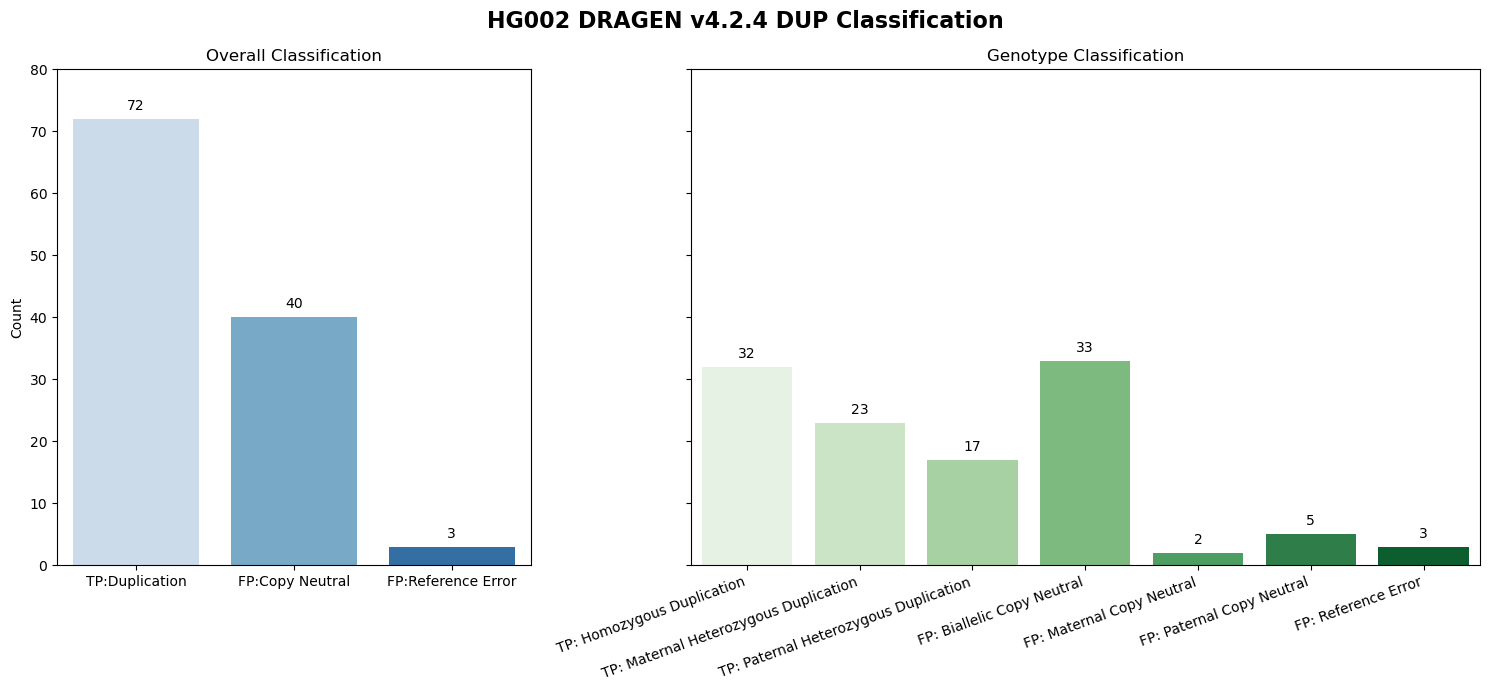

In [230]:
# Plot the performance of DRAGEN DUP classification

# Annotate the unknown classification
maj_classifications = ['TP:Duplication', 'FP:Copy Neutral', 'FP:Reference Error']
maj_count = [72,40,3]
sub_classifications = ['TP: Homozygous Duplication', 'TP: Maternal Heterozygous Duplication', 'TP: Paternal Heterozygous Duplication', 'FP: Biallelic Copy Neutral', 'FP: Maternal Copy Neutral', 'FP: Paternal Copy Neutral', 'FP: Reference Error']
sub_count = [32,23,17,33,2,5,3]

f, (ax0, ax1) = plt.subplots(nrows= 1, ncols= 2, figsize=(15,7), sharey=True, gridspec_kw={'width_ratios': [1.2, 2]})
maj_bar = sns.barplot(x=maj_classifications, y=maj_count, ax=ax0, palette='Blues')
ax0.set_xlabel('')
ax0.set_ylabel('Count')
ax0.set_ylim(0,80)
ax0.set_title('Overall Classification', fontsize=12)


sub_bar = sns.barplot(x=sub_classifications, y=sub_count, ax=ax1, palette='Greens')
ax1.set_xlabel('')
ax1.set_title('Genotype Classification', fontsize=12)

plt.xticks(rotation=20, ha='right')

# Annotations for major classifications
for i, count in enumerate(maj_count):
    maj_bar.text(i, count + 1, str(count), ha='center', va='bottom')

# Annotations for sub classifications
for i, count in enumerate(sub_count):
    sub_bar.text(i, count + 1, str(count), ha='center', va='bottom')

plt.suptitle('HG002 DRAGEN v4.2.4 DUP Classification', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig('HG002_DRAGEN_DUP_Classification.png', dpi=300)

# Get qualified DUP intervals from GATK-SV

In [232]:
# Load GATK-SV HG002 results
HG2_GATK_SV_vcf_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1818/GATK-SV_HG002.vcf"
HG2_GATK_SV_df = read_vcf(HG2_GATK_SV_vcf_path)
HG2_GATK_SV_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,10639,hgdp_and_hgsv_BND_chr1_1,N,<BND>,328,HIGH_SR_BACKGROUND;UNRESOLVED,ALGORITHMS=manta;AN=2;CHR2=chr15;END=10639;END...,GT:CONC_ST:ECN:EV:GQ:OGQ:PE_GQ:PE_GT:SL:SR_GQ:...,"0/0:EMPTY:2:PE,SR:99:99:99:0:-5815:0:0:pass"
1,chr1,11000,hgdp_and_hgsv_DUP_chr1_1,N,<DUP>,143,.,ALGORITHMS=depth;AN=2;END=51000;EVIDENCE=RD;MI...,GT:CONC_ST:ECN:EV:GQ:OGQ:RD_CN:RD_GQ:SL:GT_FILTER,0/0:EMPTY:2:RD:99:15:2:15:-975:pass
2,chr1,29000,hgdp_and_hgsv_DUP_chr1_2,N,<DUP>,999,.,"ALGORITHMS=depth;AN=2;END=140000;EVIDENCE=BAF,...",GT:CONC_ST:ECN:EV:GQ:OGQ:RD_CN:RD_GQ:SL:GT_FILTER,0/0:EMPTY:2:RD:99:4:1:4:-274:pass
3,chr1,40000,hgdp_and_hgsv_CNV_chr1_1,N,<CNV>,999,MULTIALLELIC,"ALGORITHMS=depth;END=107150;EVIDENCE=BAF,RD;MI...",GT:CN:CNQ:ECN:EV:OGQ:RD_CN:RD_GQ:SL:GT_FILTER:GQ,.:0:86:2:RD:-1:0:-1:334:pass:99
4,chr1,54669,hgdp_and_hgsv_INS_chr1_1,N,<INS>,349,HIGH_SR_BACKGROUND;HIGH_NCR,ALGORITHMS=manta;AN=0;END=54669;EVIDENCE=SR;MI...,GT:CONC_ST:ECN:EV:GQ:OGQ:PE_GQ:PE_GT:SL:SR_GQ:...,./.:EMPTY:2:SR:12:0:99:0:-64:0:1:hetFail


In [233]:
# Select the DUP intervals
# I am going to ignore ALT=<CNV> (multi-allelic) for now
qualified_dup_index = []
gatk_sv_dup_intervals = []
for index, row in HG2_GATK_SV_df.iterrows():
    if row['ALT'] == '<DUP>' and row['FILTER'] == '.' and row['SAMPLE'].split(':')[0] != '0/0' and int(row['INFO'].split('SVLEN=')[1].split(';')[0]) > 1000:
        gatk_sv_dup_intervals.append(row['CHROM'] + ':' + str(row['POS']) + '-' + str(row['INFO'].split('END=')[1].split(';')[0]))
        qualified_dup_index.append(index)
print('HG2 GATK-SV DUP intervals:',len(gatk_sv_dup_intervals))
        
# Save the qualified DUP intervals to a df and make a VCF out of it
# The initial VCF is too messy to be viewed in IGV
qualified_dup_df = HG2_GATK_SV_df.iloc[qualified_dup_index]

HG2 GATK-SV DUP intervals: 250


In [161]:
# Change the name CHROM to #CHROM to comply with VCF format
# And save the qualified DUP intervals to a VCF
qualified_dup_df = qualified_dup_df.rename(columns={'CHROM':'#CHROM'})
qualified_dup_df.head()
qualified_dup_df.to_csv('HG002_GATK_SV_DUP.vcf', sep='\t', index=False)

In [132]:
# Check the filter column in GATK-SV output
HG2_GATK_SV_df['FILTER'].value_counts()

FILTER
BOTHSIDES_SUPPORT                                                         92425
.                                                                         90002
UNRESOLVED                                                                34627
HIGH_SR_BACKGROUND                                                        29231
HIGH_SR_BACKGROUND;UNRESOLVED                                             28841
BOTHSIDES_SUPPORT;UNRESOLVED                                              15285
BOTHSIDES_SUPPORT;HIGH_SR_BACKGROUND;UNRESOLVED                           14310
HIGH_SR_BACKGROUND;HIGH_NCR                                               13062
BOTHSIDES_SUPPORT;HIGH_SR_BACKGROUND                                       8034
BOTHSIDES_SUPPORT;HIGH_SR_BACKGROUND;HIGH_NCR                              4144
HIGH_NCR                                                                   3165
BOTHSIDES_SUPPORT;PESR_GT_OVERDISPERSION                                   2885
BOTHSIDES_SUPPORT;HIGH_NCR       

# Minimap2 Bug

In [238]:
# This GATK-SV DUP suggested a bug in minimap2
duplication_evaluation.eval_dup_interval('chr19:54768874-54778874', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr19:54768874-54778874
hg38 dup count: 0
hg2 dup count: 4
interval: chr19_MATERNAL:57390716-57400715	strand: 1, start: 0, end: 10001
interval: chr19_MATERNAL:57530975-57540973	strand: 1, start: 0, end: 10001
interval: chr19_PATERNAL:57482608-57492609	strand: 1, start: 0, end: 10001
interval: chr19_PATERNAL:57574268-57584266	strand: 1, start: 0, end: 10001
The DUP interval's classification is Reference Error and it will not be corrected
----------------------------------------------------------------
End of Analysis of DUP interval chr19:54768874-54778874(10001bp)
----------------------------------------------------------------


{'dup_interval': 'chr19:54768874-54778874',
 'dup_interval_size': 10001,
 'original_hg38_hit_count': 0,
 'original_hg2_hit_count': 4,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 2,
 'original_dup_interval_major_classification': 'Reference Error',
 'original_dup_interval_sub_classification': 'hg38 Reference Error',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': nan,
 'corrected_interval_size': nan,
 'expanded_length': nan,
 'corrected_hg38_hit_count': nan,
 'corrected_hg2_hit_count': nan,
 'corrected_hg2_mat_hit_count': nan,
 'corrected_hg2_pat_hit_count': nan,
 'corrected_dup_interval_major_classification': nan,
 'corrected_dup_interval_sub_classification': nan,
 'corrected_pos_accuracy': nan,
 'corrected_end_accuracy': nan}

In [239]:
v.align_interval_no_restriction('chr19:54768874-54778874', ReferenceLocations.hg38, hg38, hg002t2t)

([],
 [['chr19_PATERNAL:57482608-57492609', 1, 0, 10001],
  ['chr19_MATERNAL:57390716-57400715', 1, 0, 10001],
  ['chr19_PATERNAL:57574268-57584266', 1, 0, 10001],
  ['chr19_MATERNAL:57530975-57540973', 1, 0, 10001]])

In [242]:
# Check the sequence in question
import T2T_ACE.genomic_queries as genomic_queries
seq_in_question = genomic_queries.get_sequence_from_interval(ReferenceLocations.hg38, 'chr19:54768874-54778874')

In [352]:
seq_base_count = {}
for i in 'A', 'T', 'C', 'G':
    seq_base_count[i] = seq_in_question.count(i)
seq_base_count

{'A': 2641, 'T': 2529, 'C': 2212, 'G': 2619}

In [357]:
# Check if the sum of all the base count is equal to the length of the sequence
sum([i for i in seq_base_count.values()]) == len(seq_in_question)

True

In [244]:
[[v.extract_interval_from_hit(_), _.strand, _.q_st, _.q_en] for _ in hg38.map(seq_in_question)]
# This seems to be a minimap2 bug
# The alignment results can't report the original interval

[['chr19_KI270915v1_alt:90224-100225', -1, 0, 10001],
 ['chr19_KI270919v1_alt:90203-100204', -1, 0, 10001],
 ['chr19_KI270889v1_alt:90224-100225', -1, 0, 10001],
 ['chr19_KI270891v1_alt:90240-100241', -1, 0, 10001],
 ['chr19_KI270885v1_alt:90533-100534', -1, 0, 10001],
 ['chr19_KI270887v1_alt:129550-139551', -1, 0, 10001]]

# GATK-SV DUP evaluation

In [283]:
# Perform DUP evaluation on all the HG002 DUP intervals from GATK-SV
hg2_gatk_sv_dup_summary_df = create_dup_sum(gatk_sv_dup_intervals)
hg2_gatk_sv_dup_summary_df.head()

chr1:666500-687000
----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr1:666500-687000
hg38 dup count: 6
interval: chr1:666499-687000	strand: 1, start: 0, end: 20501
interval: chr1:430757-452024	strand: 1, start: 0, end: 20501
interval: chr5:181366940-181388130	strand: -1, start: 0, end: 20501
interval: chr6:86715-107202	strand: 1, start: 0, end: 20501
interval: chr8:144458-167370	strand: 1, start: 0, end: 20501
interval: chr15:101875614-101896524	strand: -1, start: 0, end: 20501
hg2 dup count: 6
interval: chr1_MATERNAL:94758-115490	strand: 1, start: 0, end: 20501
interval: chr5_MATERNAL:183145343-183166919	strand: -1, start: 0, end: 20501
interval: chr6_MATERNAL:174624705-174648891	strand: -1, start: 0, end: 20501
interval: chr1_PATERNAL:95380-116112	strand: 1, start: 0, end: 20501
interval: chr5_PATERNAL:188758093-188779130	strand: -1, start: 0, e

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_major_classification,original_dup_interval_sub_classification,original_dup_interval_contain_big_gap,corrected_interval,corrected_interval_size,expanded_length,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_major_classification,corrected_dup_interval_sub_classification,corrected_pos_accuracy,corrected_end_accuracy
0,chr1:666500-687000,20501,6,6,3,3,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1:1905555-1912230,6676,1,2,1,1,Copy Neutral,Biallelic Copy Neutral,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1:13173192-13248384,75193,1,2,1,1,Copy Neutral,Biallelic Copy Neutral,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1:13215000-13305884,90885,1,4,2,2,Duplication,Homozygous Duplication,False,chr1:13222374-13349092,126719.0,35834.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,1.0
4,chr1:13234384-13240384,6001,1,3,2,1,Duplication,Maternal Heterozygous Duplication,False,chr1:13232587-13272185,39599.0,33598.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,0.0


In [284]:
hg2_gatk_sv_dup_summary_df['original_dup_interval_major_classification'].value_counts()

original_dup_interval_major_classification
Copy Neutral       150
Duplication         62
Unknown             30
Reference Error      7
Minimap2 Error       1
Name: count, dtype: int64

In [286]:
hg2_gatk_sv_dup_summary_df['original_dup_interval_contain_big_gap'].value_counts()

original_dup_interval_contain_big_gap
False    246
True       4
Name: count, dtype: int64

In [287]:
hg2_gatk_sv_dup_summary_df.to_csv('HG002_GATK_SV_DUP_Summary.csv', index=False)

In [311]:
# Collect hg38 hit count for both DRAGEN and GATK-SV
import numpy as np
gatk_sv_hg38_hit_count_df = pd.DataFrame(hg2_gatk_sv_dup_summary_df['original_hg38_hit_count'].value_counts())
gatk_sv_hg38_hit_count_df['percent'] = np.round(gatk_sv_hg38_hit_count_df['count']/gatk_sv_hg38_hit_count_df['count'].sum(),2)
gatk_sv_hg38_hit_count_df['caller'] = 'GATK-SV'


dragen_hg38_hit_count_df = pd.DataFrame(dragen_dup_sum['original_hg38_hit_count'].value_counts())
dragen_hg38_hit_count_df['percent'] = np.round(dragen_hg38_hit_count_df['count']/dragen_hg38_hit_count_df['count'].sum(),2)
dragen_hg38_hit_count_df['caller'] = 'DRAGEN'

hg38_hit_count_df = pd.concat([gatk_sv_hg38_hit_count_df, dragen_hg38_hit_count_df], axis=0)
hg38_hit_count_df = hg38_hit_count_df.reset_index()
hg38_hit_count_df

,original_hg38_hit_count,count,percent,caller
0,1,130,0.52,GATK-SV
1,2,65,0.26,GATK-SV
2,3,26,0.10,GATK-SV
3,4,17,0.07,GATK-SV
4,6,7,0.03,GATK-SV
5,5,4,0.02,GATK-SV
6,0,1,0.00,GATK-SV
7,1,106,0.93,DRAGEN
8,2,6,0.05,DRAGEN
9,3,2,0.02,DRAGEN


/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

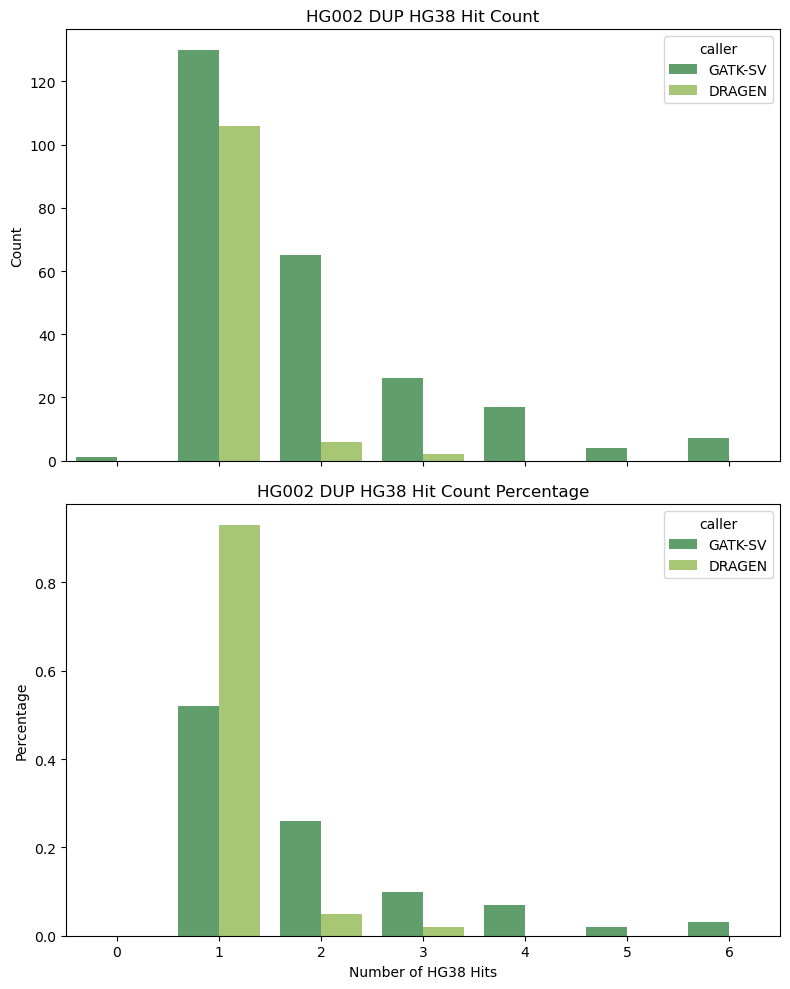

In [330]:
# Plot the HG38 hit count for both DRAGEN and GATK-SV
f, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(8,10), sharex=True)
sns.barplot(hg38_hit_count_df, x="original_hg38_hit_count", y="count", hue="caller", ax=ax0, palette='summer')
ax0.set_xlabel('')
ax0.set_ylabel('Count')
ax0.set_title('HG002 DUP HG38 Hit Count')
sns.move_legend(ax0, "upper right")

sns.barplot(hg38_hit_count_df, x="original_hg38_hit_count", y="percent", hue="caller", ax=ax1, palette='summer')
ax1.set_xlabel('Number of HG38 Hits')
ax1.set_ylabel('Percentage')
ax1.set_title('HG002 DUP HG38 Hit Count Percentage')
sns.move_legend(ax1, "upper right")

plt.tight_layout()
plt.savefig('HG002_DUP_HG38_Hit_Count.png', dpi=300)

In [325]:
gatk_sv_classification_df = pd.DataFrame(hg2_gatk_sv_dup_summary_df['original_dup_interval_major_classification'].value_counts())
gatk_sv_classification_df['percent'] = np.round(gatk_sv_classification_df['count']/gatk_sv_classification_df['count'].sum(),2)
gatk_sv_classification_df['caller'] = 'GATK-SV'


dragen_classification_df = pd.DataFrame(dragen_dup_sum['original_dup_interval_major_classification'].value_counts())
dragen_classification_df['percent'] = np.round(dragen_classification_df['count']/dragen_classification_df['count'].sum(),2)
dragen_classification_df['caller'] = 'DRAGEN'

classification_df = pd.concat([gatk_sv_classification_df, dragen_classification_df], axis=0)
classification_df = classification_df.reset_index()
classification_df.drop(4, inplace=True)
#classification_df.reset_index(inplace=True)
classification_df

,original_dup_interval_major_classification,count,percent,caller
0,Copy Neutral,150,0.60,GATK-SV
1,Duplication,62,0.25,GATK-SV
2,Unknown,30,0.12,GATK-SV
3,Reference Error,7,0.03,GATK-SV
5,Duplication,72,0.63,DRAGEN
6,Copy Neutral,38,0.33,DRAGEN
7,Reference Error,3,0.03,DRAGEN
8,Unknown,1,0.01,DRAGEN


/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

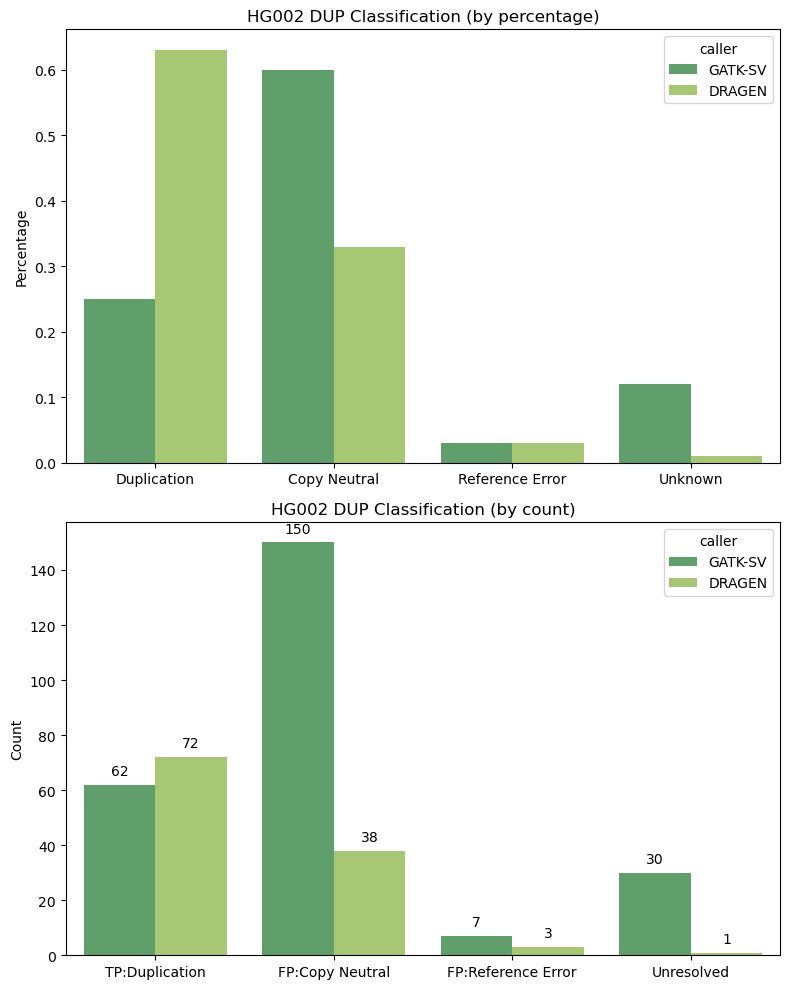

In [343]:
# Plot DUP Classification for both DRAGEN and GATK-SV
f, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

percent_bar = sns.barplot(classification_df, x="original_dup_interval_major_classification", y="percent", hue="caller", ax=ax0, palette='summer', order=['Duplication', 'Copy Neutral', 'Reference Error', 'Unknown'])
ax0.set_xlabel('')
ax0.set_ylabel('Percentage')
ax0.set_title('HG002 DUP Classification (by percentage)')
sns.move_legend(ax0, "upper right")

count_bar = sns.barplot(classification_df, x="original_dup_interval_major_classification", y="count", hue="caller", ax=ax1, palette='summer', order=['Duplication', 'Copy Neutral', 'Reference Error', 'Unknown'])
ax1.set_xlabel('')
ax1.set_ylabel('Count')
ax1.set_title('HG002 DUP Classification (by count)')
ax1.set_xticklabels(['TP:Duplication', 'FP:Copy Neutral', 'FP:Reference Error', 'Unresolved'])
sns.move_legend(ax1, "upper right")

# # Adding percent numbers on top of each bar for ax0
# for p in ax0.patches:
#     ax0.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding count numbers on top of each bar for ax1
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    
plt.tight_layout()
plt.savefig('HG002_DUP_classification.png', dpi=300)

In [346]:
hg2_gatk_sv_dup_summary_df[hg2_gatk_sv_dup_summary_df['original_dup_interval_major_classification']=='Unknown']

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_major_classification,original_dup_interval_sub_classification,original_dup_interval_contain_big_gap,corrected_interval,corrected_interval_size,expanded_length,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_major_classification,corrected_dup_interval_sub_classification,corrected_pos_accuracy,corrected_end_accuracy
0,chr1:666500-687000,20501,6,6,3,3,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,chr1:148640587-148658587,18001,5,6,2,4,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,chr1:149196587-149213350,16764,4,6,3,3,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,chr1:149209900-149268587,58688,4,6,3,3,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,chr1:149696587-149712587,16001,4,6,4,2,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,chr2:91598000-91662511,64512,5,6,3,3,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,chr5:70305807-70322000,16194,4,6,3,3,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,chr8:8015500-8069127,53628,4,6,2,4,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,chr9:10000-17000,7001,4,6,4,2,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,chr9:63252931-63491450,238520,3,4,2,2,Unknown,Unknown,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
